# Decision Tree Model: Hyperparameter Tuning and Analysis

## Overview
This notebook performs comprehensive analysis and hyperparameter tuning on a custom Decision Tree model built from scratch.

## Objectives
1. **Hyperparameter Tuning**: Optimize `max_depth` and `min_samples_split` parameters
2. **Performance Evaluation**: Assess model using multiple metrics
3. **Model Analysis**: Understand feature importance and model behavior
4. **Overfitting Analysis**: Examine training vs validation performance

## Tasks to Complete

### C4. Hyperparameter Tuning and Analysis
- Explore `max_depth ∈ {2, 4, 6, 8, 10}` and `min_samples_split ∈ {2, 5, 10}`
- Use validation set to select best hyperparameter combination
- Retrain model on combined training+validation data with optimal parameters
- Evaluate final model on test set
- Analyze how training/validation accuracy change with `max_depth` (with fixed `min_samples_split`)
- Present results in tables and plots

### C5. Analysis and Evaluation
**Required Analysis:**
1. **Hyperparameter Tuning**: Test different `max_depth` values
2. **Performance Metrics**: Calculate Accuracy, Precision, Recall, F1-score for both classes
3. **Confusion Matrix**: Detailed analysis of classification errors
4. **Feature Importance**: Rank features by their information gain contribution  
5. **Tree Complexity**: Analyze relationship between tree depth and performance
6. **Overfitting Analysis**: Compare training vs validation performance

## Implementation Approach
1. **Stratified Data Split**: 70% training, 15% validation, 15% test (preserving class distribution)
2. **Grid Search**: Systematic exploration of hyperparameter combinations
3. **Visual Analysis**: Plots showing model behavior and performance trade-offs
4. **Comprehensive Metrics**: Multiple evaluation perspectives on model quality

## Expected Outcomes
- Optimal hyperparameter combination for the decision tree
- Understanding of model strengths and weaknesses
- Insights into feature importance for the classification task
- Documentation of overfitting patterns and model complexity trade-offs

### Fetching and Splitting Data

In [24]:
import sys
import os

# Adding project root to Python path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from sklearn import datasets
from src.utils.data_split import split_data

data = datasets.load_breast_cancer()

X, y = data.data, data.target 


X_train, X_val, X_test, y_train, y_val, y_test = split_data(X,y)

In [25]:
import importlib
from src.models import decision_tree

# 1. First, reload the entire src.models package
importlib.reload(decision_tree)

# 2. Now you can import specific classes/functions
from src.models.decision_tree import DecisionTree

# Define hyperparameter grid
max_depths = [2, 4, 6, 8, 10]
min_samples_splits = [2, 5, 10]

# Results storage
results = {
    'max_depth': [],
    'min_samples_split': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'test_accuracy': []
}

# Best model tracking
best_accuracy = 0
best_params = {}

In [26]:
from sklearn.metrics import accuracy_score

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Initialize and train model with current parameters
        model = DecisionTree(
            max_depth=max_depth,
            min_samples=min_samples_split,
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Calculate accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        
        # Store results
        results['max_depth'].append(max_depth)
        results['min_samples_split'].append(min_samples_split)
        results['train_accuracy'].append(train_acc)
        results['val_accuracy'].append(val_acc)
        
        # Check if this is the best validation accuracy
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

### Retraining with validation data

In [27]:
import numpy as np
# Combine training and validation sets
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])

# Train best model on combined data
best_model = DecisionTree(
    max_depth=best_params['max_depth'],
    min_samples=best_params['min_samples_split'],
)
best_model.fit(X_train_val, y_train_val)

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Validation Accuracy: 0.941
Test Accuracy: 0.977


### Analysis of max_depth vs Performance (Fixed min_samples_split)

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import plots



# Create analysis table for fixed min_samples_split
def analyze_depth_performance(fixed_min_samples=2):
    depth_analysis = []
    
    for max_depth in max_depths:
        model = DecisionTree(
            max_depth=max_depth,
            min_samples=fixed_min_samples,
            
        )
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)


        
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        
        depth_analysis.append({
            'max_depth': max_depth,
            'train_accuracy': train_acc,
            'validation_accuracy': val_acc,
            'difference': train_acc - val_acc
        })
    
    return pd.DataFrame(depth_analysis)

# Create analysis for each min_samples_split value
analysis_results = {}
for min_split in min_samples_splits:
    analysis_results[f'min_samples_split={min_split}'] = analyze_depth_performance(min_split)

# Display results
for key, df in analysis_results.items():
    print(f"\n{key}:")
    print(df.to_string(index=False))


min_samples_split=2:
 max_depth  train_accuracy  validation_accuracy  difference
         2        0.927136             0.917647    0.009489
         4        0.992462             0.941176    0.051286
         6        0.997487             0.941176    0.056311
         8        1.000000             0.941176    0.058824
        10        1.000000             0.941176    0.058824

min_samples_split=5:
 max_depth  train_accuracy  validation_accuracy  difference
         2        0.927136             0.917647    0.009489
         4        0.989950             0.929412    0.060538
         6        0.994975             0.941176    0.053798
         8        0.994975             0.941176    0.053798
        10        0.994975             0.929412    0.065563

min_samples_split=10:
 max_depth  train_accuracy  validation_accuracy  difference
         2        0.927136             0.917647    0.009489
         4        0.984925             0.941176    0.043748
         6        0.984925       


### Visualization of Training vs Validation Performance

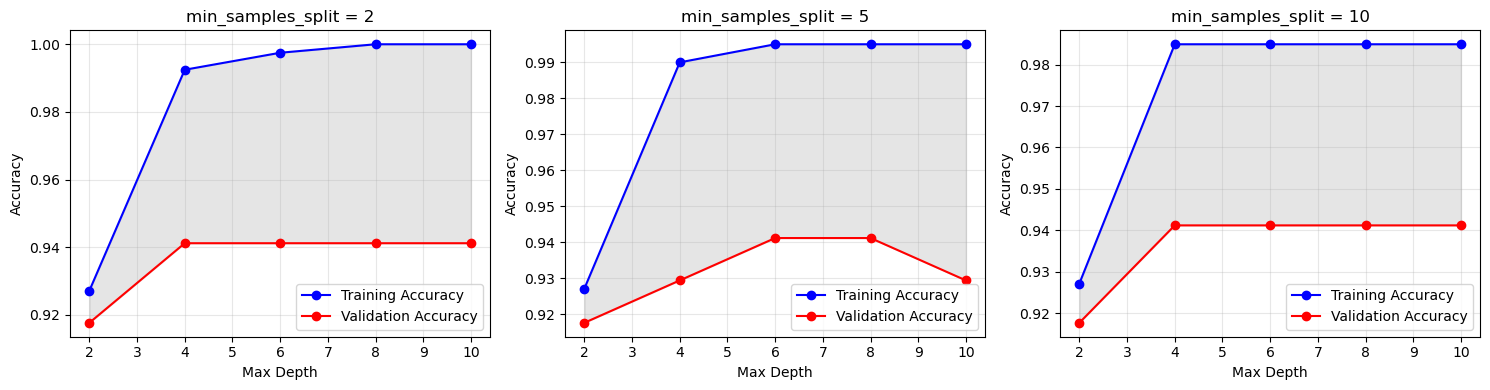

In [29]:
import importlib
from src.utils import plots

# 1. First, reload the entire src.models package
importlib.reload(plots)

# 2. Now you can import specific classes/functions
from src.utils import plots

plots.decision_tree_vs_performance(min_samples_splits,analysis_results)




### Analysis and Evaluation

In [30]:
from src.utils import metrics


train_metrics = metrics.calculate_metrics(y_train_val, best_model.predict(X_train_val), 'train_')
test_metrics = metrics.calculate_metrics(y_test, y_test_pred, 'test_')

# Combining results
all_metrics = {**train_metrics, **test_metrics}
metrics_df = pd.DataFrame([all_metrics])
print("\nPerformance Metrics:")
print(metrics_df.T.to_string(header=False))


Performance Metrics:
train_accuracy                      0.989648
train_precision                     0.986667
train_recall                        0.996633
train_f1_score                      0.991625
train_confusion_matrix  [[182, 4], [1, 296]]
test_accuracy                       0.976744
test_precision                      0.983333
test_recall                         0.983333
test_f1_score                       0.983333
test_confusion_matrix     [[25, 1], [1, 59]]


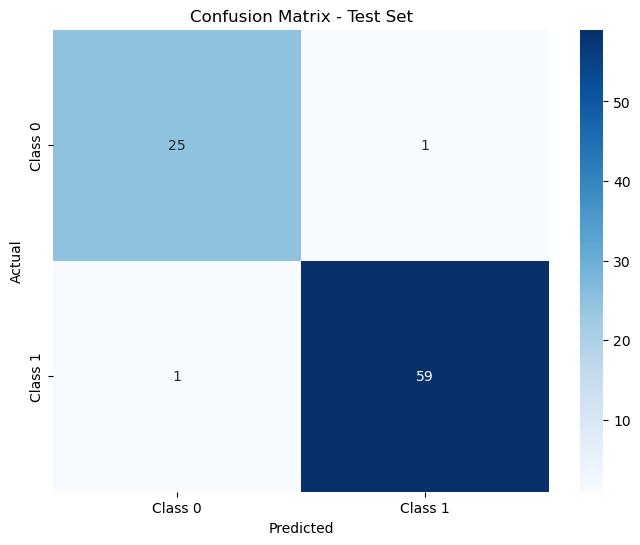


Error Analysis:
True Positives: 59.000
True Negatives: 25.000
False Positives: 1.000
False Negatives: 1.000
False Positive Rate: 0.038
False Negative Rate: 0.017
Error Rate: 0.023


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Detailed error analysis
tn, fp, fn, tp = cm.ravel()
error_analysis = {
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'False Positive Rate': fp/(fp+tn),
    'False Negative Rate': fn/(fn+tp),
    'Error Rate': (fp+fn)/(tp+tn+fp+fn)
}

print("\nError Analysis:")
for key, value in error_analysis.items():
    print(f"{key}: {value:.3f}")


### Feature Importance Analysis

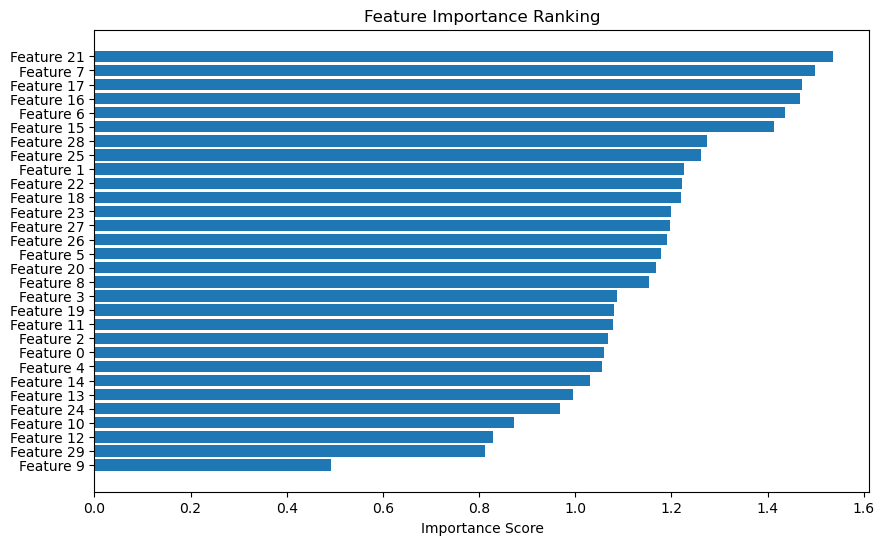


Top 5 Most Important Features:
   feature  importance
Feature 21    1.535142
 Feature 7    1.498478
Feature 17    1.471531
Feature 16    1.468147
 Feature 6    1.436602


In [32]:
# Get feature importance
feature_importance_df = best_model.calculate_feature_importance()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), 
         feature_importance_df['importance'].values)
plt.yticks(range(len(feature_importance_df)), 
           feature_importance_df['feature'].values)
plt.xlabel('Importance Score')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head().to_string(index=False))

### Tree Complexity Analysis

In [34]:
import importlib
from src.utils import metrics


importlib.reload(metrics)


from src.utils import metrics
# Analyze best model complexity
complexity = metrics.analyze_tree_complexity(best_model)
print("\nTree Complexity Analysis:")
for key, value in complexity.items():
    print(f"{key}: {value:.3f}")

# Analyze complexity vs performance for different depths
complexity_analysis = []
for max_depth in max_depths:
    model = DecisionTree(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    comp = metrics.analyze_tree_complexity(model)
    comp['max_depth'] = max_depth
    comp['validation_accuracy'] = val_acc
    
    complexity_analysis.append(comp)

complexity_df = pd.DataFrame(complexity_analysis)
print("\nComplexity vs Performance:")
print(complexity_df[['max_depth', 'Number of Nodes', 'Number of Leaves', 
                     'Tree Depth', 'validation_accuracy']].to_string(index=False))


Tree Complexity Analysis:
Number of Nodes: 21.000
Number of Leaves: 11.000
Tree Depth: 4.000
Branching Factor: 0.500

Complexity vs Performance:
 max_depth  Number of Nodes  Number of Leaves  Tree Depth  validation_accuracy
         2                7                 4           2             0.917647
         4               21                11           4             0.941176
         6               25                13           6             0.929412
         8               27                14           7             0.941176
        10               27                14           7             0.941176


### Overfitting Analysis


Overfitting Analysis:
            Model  Train Accuracy  Val Accuracy  Gap (Train - Val)  Overfitting Ratio
Shallow (depth=2)        0.927136      0.917647           0.009489           0.010234
 Medium (depth=4)        0.992462      0.929412           0.063051           0.063529
  Deep (depth=10)        1.000000      0.941176           0.058824           0.058824
       Best Model        0.992462      0.941176           0.051286           0.051675


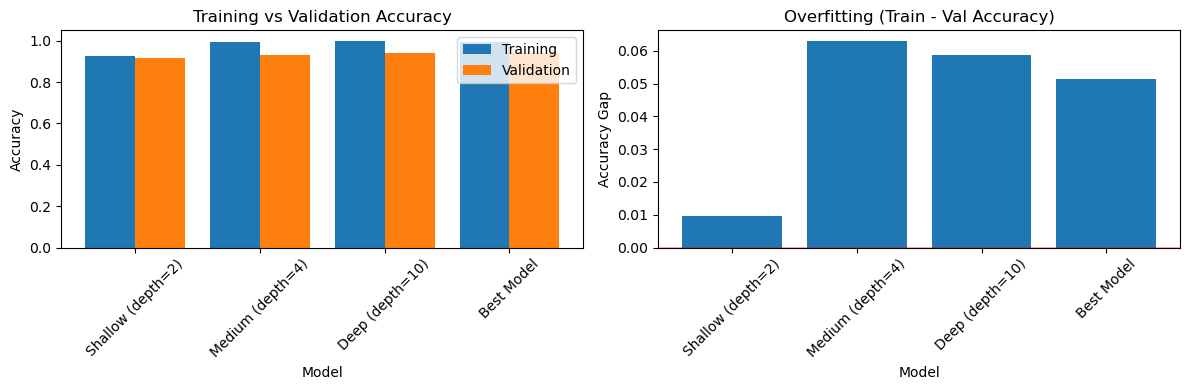

In [35]:
def analyze_overfitting(models, X_train, y_train, X_val, y_val):
    """Analyze overfitting patterns across different models"""
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        
        train_acc = accuracy_score(y_train, train_pred)
        val_acc = accuracy_score(y_val, val_pred)
        
        results.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Val Accuracy': val_acc,
            'Gap (Train - Val)': train_acc - val_acc,
            'Overfitting Ratio': (train_acc - val_acc) / train_acc if train_acc > 0 else 0
        })
    
    return pd.DataFrame(results)

# Create models with different complexities
models_to_compare = {
    'Shallow (depth=2)': DecisionTree(max_depth=2),
    'Medium (depth=4)': DecisionTree(max_depth=4),
    'Deep (depth=10)': DecisionTree(max_depth=10),
    'Best Model': best_model
}

overfitting_df = analyze_overfitting(models_to_compare, X_train, y_train, X_val, y_val)
print("\nOverfitting Analysis:")
print(overfitting_df.to_string(index=False))

# Plot overfitting analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy comparison
models = overfitting_df['Model']
train_acc = overfitting_df['Train Accuracy']
val_acc = overfitting_df['Val Accuracy']

x = range(len(models))
ax1.bar(x, train_acc, width=0.4, label='Training', align='center')
ax1.bar([i + 0.4 for i in x], val_acc, width=0.4, label='Validation', align='center')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training vs Validation Accuracy')
ax1.set_xticks([i + 0.2 for i in x])
ax1.set_xticklabels(models, rotation=45)
ax1.legend()

# Overfitting gap
ax2.bar(models, overfitting_df['Gap (Train - Val)'])
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy Gap')
ax2.set_title('Overfitting (Train - Val Accuracy)')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='r', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## Bias–Variance Trade-off in Decision Trees

Decision Trees are powerful models that can capture complex patterns, but their performance is heavily influenced by **bias and variance**:

### 1️⃣ Bias
- Bias measures **how much the model's predictions differ from the true values** on average.
- Deep or fully-grown trees have **low bias**, meaning they can fit the training data very closely.
- Shallow trees have **higher bias**, as they are too simple to capture complex relationships.

### 2️⃣ Variance
- Variance measures **how sensitive the model is to small changes in the training data**.
- Fully-grown trees have **high variance**: small changes in the data can lead to very different trees.
- Shallow trees have **low variance**, as they are less sensitive to fluctuations in the training data.

### 3️⃣ The Trade-off
| Tree Depth | Bias | Variance | Generalization |
|------------|------|----------|----------------|
| Shallow    | High | Low      | Underfits      |
| Deep       | Low  | High     | Overfits       |

- **Goal**: find a tree depth (or use regularization like (`min_samples`) that balances bias and variance to **maximize generalization**.

### 4️⃣ Implications
- Decision Trees alone can **overfit easily** if grown too deep.
- Techniques like **Random Forests** and **pruning** are used to reduce variance while maintaining low bias.
